# Coursera Capstone

### This notebook is mainly consist of the contents and code related to the Coursera Capstone project

-------------------
-------------------
## Importing Libraries
-------------------
-------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

-------------------
-------------------
## Load Dataset
-------------------
-------------------

In [2]:
mobile_phones = pd.read_csv("dataset/train.csv")

In [3]:
mobile_phones_test = pd.read_csv("dataset/test.csv")

### Analyzing Dataset
-------------------

In [4]:
mobile_phones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
mobile_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
mobile_phones['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [7]:
mobile_phones.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
mobile_phones.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
mobile_phones.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

-------------------
-------------------
## Exploratory Data Analysis
-------------------
-------------------

<AxesSubplot:xlabel='price_range', ylabel='count'>

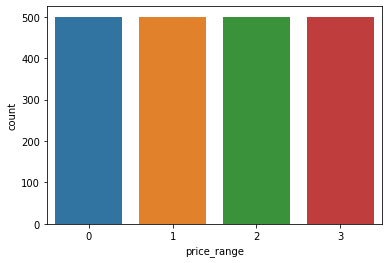

In [10]:
sns.countplot(x='price_range', data=mobile_phones)

<AxesSubplot:xlabel='blue', ylabel='count'>

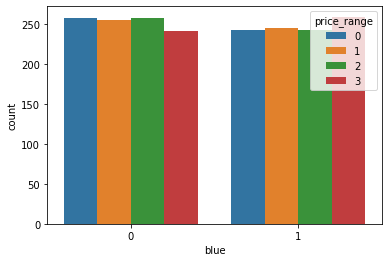

In [11]:
sns.countplot(x='blue', hue='price_range', data=mobile_phones)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

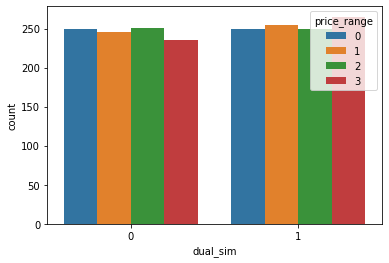

In [12]:
sns.countplot(x='dual_sim', hue='price_range', data=mobile_phones)

<AxesSubplot:xlabel='four_g', ylabel='count'>

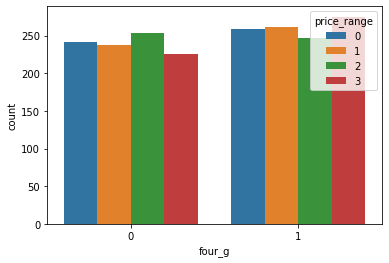

In [13]:
sns.countplot(x='four_g', hue='price_range', data=mobile_phones)

<AxesSubplot:xlabel='wifi', ylabel='count'>

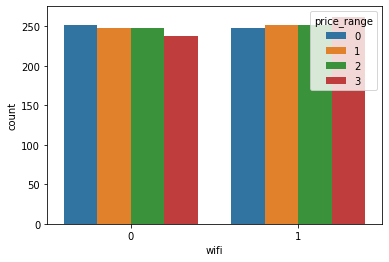

In [14]:
sns.countplot(x='wifi', hue='price_range', data=mobile_phones)

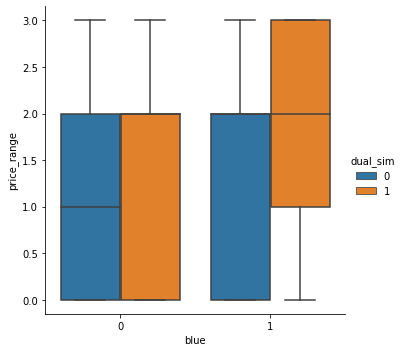

In [15]:
sns.catplot(x="blue", y="price_range", hue="dual_sim", data=mobile_phones, kind="box")

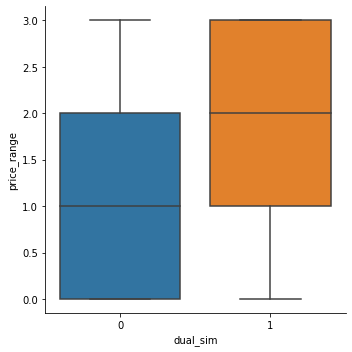

In [16]:
sns.catplot(x='dual_sim', y='price_range', data=mobile_phones, kind='box')

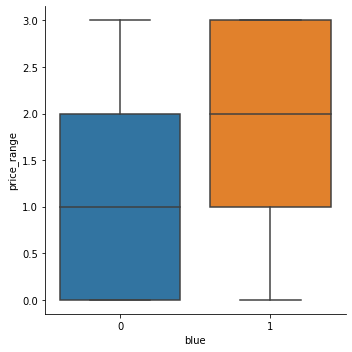

In [17]:
sns.catplot(x='blue', y='price_range', data=mobile_phones, kind='box')

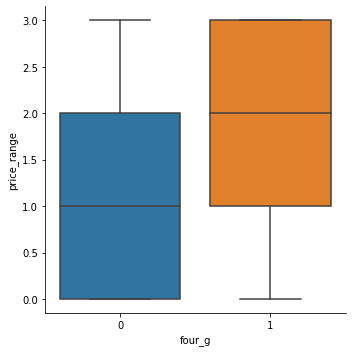

In [18]:
sns.catplot(x='four_g', y='price_range', data=mobile_phones, kind='box')

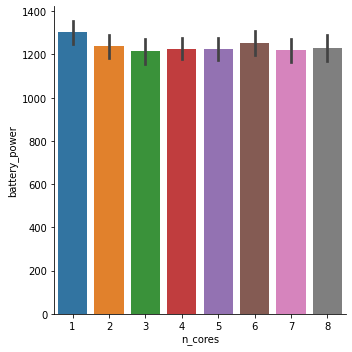

In [19]:
sns.catplot(x='n_cores', y='battery_power' , data=mobile_phones, kind='bar')

(array([46., 41., 44., 50., 42., 40., 38., 49., 33., 39., 44., 48., 37.,
        49., 32., 37., 44., 32., 47., 39., 34., 41., 46., 37., 32., 43.,
        28., 47., 38., 29., 40., 44., 34., 37., 38., 50., 44., 31., 39.,
        37., 47., 33., 38., 37., 42., 42., 37., 33., 39., 52.]),
 array([ 501.  ,  530.94,  560.88,  590.82,  620.76,  650.7 ,  680.64,
         710.58,  740.52,  770.46,  800.4 ,  830.34,  860.28,  890.22,
         920.16,  950.1 ,  980.04, 1009.98, 1039.92, 1069.86, 1099.8 ,
        1129.74, 1159.68, 1189.62, 1219.56, 1249.5 , 1279.44, 1309.38,
        1339.32, 1369.26, 1399.2 , 1429.14, 1459.08, 1489.02, 1518.96,
        1548.9 , 1578.84, 1608.78, 1638.72, 1668.66, 1698.6 , 1728.54,
        1758.48, 1788.42, 1818.36, 1848.3 , 1878.24, 1908.18, 1938.12,
        1968.06, 1998.  ]),
 <BarContainer object of 50 artists>)

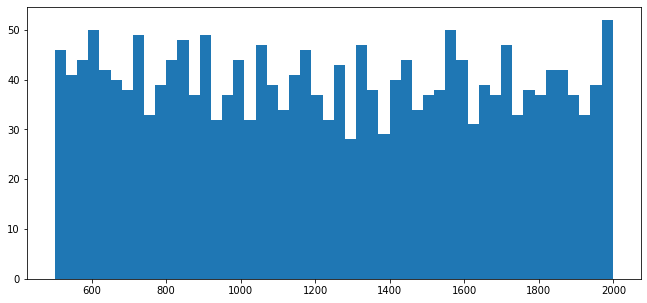

In [20]:
plt.figure(figsize=(11,5))
plt.hist(x="battery_power", bins=50, data=mobile_phones)

(array([42., 34., 48., 38., 53., 37., 40., 37., 36., 33., 42., 32., 44.,
        46., 42., 48., 41., 27., 47., 37., 33., 42., 36., 39., 39., 39.,
        35., 57., 44., 44., 42., 45., 40., 37., 38., 33., 38., 28., 44.,
        38., 42., 35., 39., 37., 44., 38., 48., 35., 47., 40.]),
 array([ 256.  ,  330.84,  405.68,  480.52,  555.36,  630.2 ,  705.04,
         779.88,  854.72,  929.56, 1004.4 , 1079.24, 1154.08, 1228.92,
        1303.76, 1378.6 , 1453.44, 1528.28, 1603.12, 1677.96, 1752.8 ,
        1827.64, 1902.48, 1977.32, 2052.16, 2127.  , 2201.84, 2276.68,
        2351.52, 2426.36, 2501.2 , 2576.04, 2650.88, 2725.72, 2800.56,
        2875.4 , 2950.24, 3025.08, 3099.92, 3174.76, 3249.6 , 3324.44,
        3399.28, 3474.12, 3548.96, 3623.8 , 3698.64, 3773.48, 3848.32,
        3923.16, 3998.  ]),
 <BarContainer object of 50 artists>)

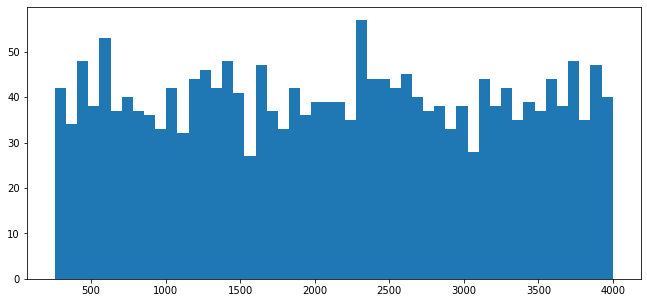

In [21]:
plt.figure(figsize=(11,5))
plt.hist(x="ram", bins=50, data=mobile_phones)

In [22]:
mobile_phones_correlation = mobile_phones.corr()

In [23]:
mobile_phones_correlation

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


-------------------
-------------------
## Preprocessing the Data
-------------------
-------------------

In [24]:
y = mobile_phones['price_range'].values

In [25]:
mobile_phones.drop(['price_range', 'clock_speed', 'mobile_wt', 'touch_screen'],
                                       axis=1,
                                      inplace=True)

In [26]:
X = mobile_phones.values

In [27]:
X.shape

(2000, 17)

In [28]:
y.shape

(2000,)

In [29]:
X[:5]

array([[8.420e+02, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 7.000e+00,
        6.000e-01, 2.000e+00, 2.000e+00, 2.000e+01, 7.560e+02, 2.549e+03,
        9.000e+00, 7.000e+00, 1.900e+01, 0.000e+00, 1.000e+00],
       [1.021e+03, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 5.300e+01,
        7.000e-01, 3.000e+00, 6.000e+00, 9.050e+02, 1.988e+03, 2.631e+03,
        1.700e+01, 3.000e+00, 7.000e+00, 1.000e+00, 0.000e+00],
       [5.630e+02, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 4.100e+01,
        9.000e-01, 5.000e+00, 6.000e+00, 1.263e+03, 1.716e+03, 2.603e+03,
        1.100e+01, 2.000e+00, 9.000e+00, 1.000e+00, 0.000e+00],
       [6.150e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01,
        8.000e-01, 6.000e+00, 9.000e+00, 1.216e+03, 1.786e+03, 2.769e+03,
        1.600e+01, 8.000e+00, 1.100e+01, 1.000e+00, 0.000e+00],
       [1.821e+03, 1.000e+00, 0.000e+00, 1.300e+01, 1.000e+00, 4.400e+01,
        6.000e-01, 2.000e+00, 1.400e+01, 1.208e+03, 1.212e+03, 1.411e+03,
    

In [30]:
y[:5]

array([1, 2, 2, 2, 1])

In [31]:
mobile_phones_test.drop(['clock_speed', 'mobile_wt', 'touch_screen', 'id'], axis=1, inplace=True)

In [32]:
X_test = mobile_phones_test.values

### Splitting the dataset into training and test set
-------------------

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the data
-------------------

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)

In [36]:
X_test_scaled = scaler.transform(X_test)

In [37]:
X_val_scaled = scaler.transform(X_val)

-------------------
-------------------
## Training the models
-------------------
-------------------

### Training the DecisionTreeClassifier
-------------------

In [38]:
tree_clf = DecisionTreeClassifier()

In [39]:
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [40]:
accuracy_score(y_train, tree_clf.predict(X_train_scaled))

1.0

In [41]:
accuracy_score(y_val, tree_clf.predict(X_val_scaled))

0.8375

### Tuning hyperparameters

In [42]:
tree_params = {"max_depth":[3,4,5,6,9,10],
                "max_features":[3,5,7,9,11,13,15,17],
               "criterion":['gini', 'entropy']}

In [43]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, n_jobs=-1, cv=3, verbose=2)

In [44]:
grid_tree.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    2.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 9, 10],
                         'max_features': [3, 5, 7, 9, 11, 13, 15, 17]},
             verbose=2)

In [45]:
tree_train_predict = grid_tree.best_estimator_.predict(X_train_scaled)

In [46]:
tree_train_accuracy = accuracy_score(y_train, tree_train_predict)

In [47]:
tree_train_accuracy

0.999375

In [48]:
tree_val_predict = grid_tree.best_estimator_.predict(X_val_scaled)

In [49]:
tree_val_accuracy = accuracy_score(y_val, tree_val_predict)

In [50]:
tree_val_accuracy

0.8475

### Training the Support Vector Classifier

In [51]:
svc_clf = SVC()

In [52]:
svc_clf.fit(X_train_scaled, y_train)

SVC()

In [53]:
accuracy_score(y_train, svc_clf.predict(X_train_scaled))

0.974375

In [54]:
accuracy_score(y_val, svc_clf.predict(X_val_scaled))

0.9125

### Tuning hyperparameters

In [55]:
svc_params = {"gamma": reciprocal(0.001, 0.01),
              "C": uniform(1,10),
              "kernel":['linear', 'rbf', 'sigmoid', 'poly'],
             "degree":[2,3,5,7,9,10,12,15]}

In [56]:
rand_svc = RandomizedSearchCV(svc_clf, svc_params, n_jobs=-1, n_iter=10,cv=3, verbose=3)

In [57]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4cdd10550>,
                                        'degree': [2, 3, 5, 7, 9, 10, 12, 15],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4cdd10fd0>,
                                        'kernel': ['linear', 'rbf', 'sigmoid',
                                                   'poly']},
                   verbose=3)

In [58]:
svc_train_predict = rand_svc.best_estimator_.predict(X_train_scaled)

In [59]:
svc_train_accuracy = accuracy_score(y_train, svc_train_predict)

In [60]:
svc_train_accuracy

0.97

In [61]:
svc_val_predict = rand_svc.best_estimator_.predict(X_val_scaled)

In [62]:
svc_val_accuracy = accuracy_score(y_val, svc_val_predict)

In [63]:
svc_val_accuracy

0.96

### Training the Random Forest Classifier

In [64]:
forest_clf = RandomForestClassifier()

In [65]:
forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [66]:
accuracy_score(y_train, forest_clf.predict(X_train_scaled))

1.0

In [67]:
accuracy_score(y_val, forest_clf.predict(X_val_scaled))

0.8925

### Tuning hyperparameters

In [68]:
forest_params = {"n_estimators":[50,100,200,400,500],
                 "max_depth":[3,4,5,6,7,9,10,11],
                  "criterion": ['gini', 'entropy'],
                "bootstrap": [True, False]}

In [69]:
grid_forest = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                 param_distributions = forest_params,
                                 n_iter = 100,
                                 cv = 3,
                                 verbose=2,
                                 random_state=42,
                                 n_jobs = -1)

In [70]:
grid_forest.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 9, 10, 11],
                                        'n_estimators': [50, 100, 200, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [71]:
forest_train_pred = grid_forest.best_estimator_.predict(X_train_scaled)

In [72]:
forest_train_accuracy = accuracy_score(y_train, forest_train_pred)

In [73]:
forest_train_accuracy

1.0

In [74]:
forest_val_pred = grid_forest.best_estimator_.predict(X_val_scaled)

In [75]:
forest_val_accuracy = accuracy_score(y_val, forest_val_pred)

In [76]:
forest_val_accuracy

0.9075

### Training the Neural Network

In [77]:
mlp_clf = MLPClassifier()

In [78]:
mlp_clf.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

In [79]:
accuracy_score(y_train, mlp_clf.predict(X_train_scaled))

0.9975

In [80]:
accuracy_score(y_val, mlp_clf.predict(X_val_scaled))

0.935

### Tuning hyperparameters

In [81]:
mlp_params = {"activation": ['identity', 'logistic', 'tanh', 'relu'],
              "solver": ['lbfgs', 'adam','sgd'], 
              "alpha":[0.0001, 0.001,0.01,0.1,1]}

In [82]:
grid_mlp = GridSearchCV(mlp_clf, mlp_params, cv=3, verbose=2, n_jobs=-1)

In [83]:
grid_mlp.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [84]:
mlp_train_predict = grid_mlp.best_estimator_.predict(X_train_scaled)

In [85]:
mlp_train_accuracy = accuracy_score(y_train, mlp_train_predict)

In [86]:
mlp_train_accuracy

0.971875

In [87]:
mlp_val_predict = grid_mlp.best_estimator_.predict(X_val_scaled)

In [88]:
mlp_val_accuracy = accuracy_score(y_val, mlp_val_predict)

In [89]:
mlp_val_accuracy

0.9675

## Visualizing Confusion Matrix

### Decision Tree Classifier

Training SET

In [90]:
cm_tree = confusion_matrix(y_train, tree_train_predict)

<AxesSubplot:>

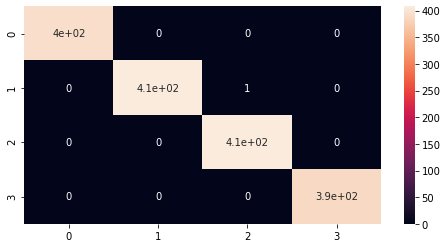

In [116]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_tree, annot=True)

Validation SET

In [94]:
cm_tree_val = confusion_matrix(y_val, tree_val_predict)

<AxesSubplot:>

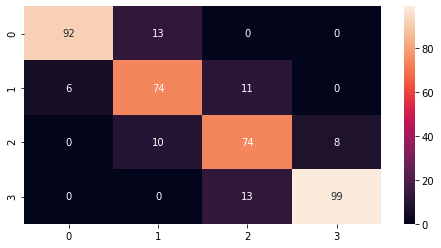

In [117]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_tree_val, annot=True)

### Support Vector Classifier

Training SET

In [118]:
cm_svc_train = confusion_matrix(y_train, svc_train_predict)

<AxesSubplot:>

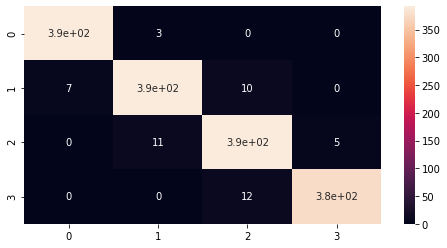

In [119]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_svc_train, annot=True)

Validation SET

In [120]:
cm_svc_val = confusion_matrix(y_val, svc_val_predict)

<AxesSubplot:>

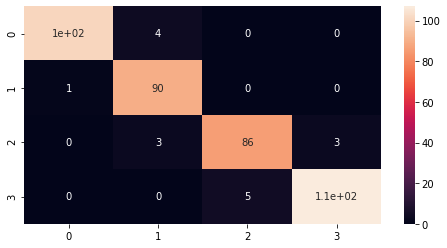

In [121]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_svc_val, annot=True)

### Random Forest Classifier

Training SET

In [122]:
cm_forest_train = confusion_matrix(y_train, forest_train_pred)

<AxesSubplot:>

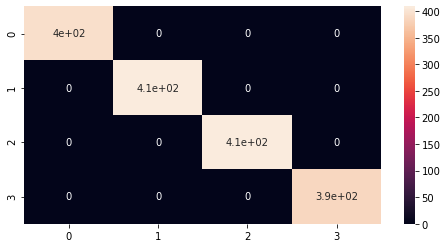

In [123]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_forest_train, annot=True)

Validation SET

In [124]:
cm_forest_val = confusion_matrix(y_val, forest_val_pred)

<AxesSubplot:>

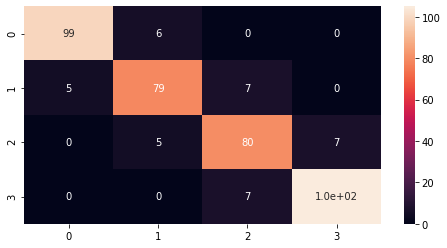

In [125]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_forest_val, annot=True)

### MLP Classifier

Training SET

In [126]:
cm_mlp = confusion_matrix(y_train, mlp_train_predict)

<AxesSubplot:>

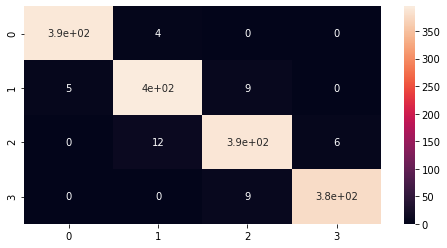

In [127]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_mlp, annot=True)

Validation SET

In [128]:
cm_mlp_val = confusion_matrix(y_val, mlp_val_predict)

<AxesSubplot:>

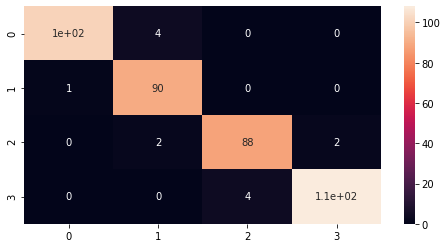

In [129]:
plt.figure(figsize=(8,4))
sns.heatmap(cm_mlp_val, annot=True)

## Visualizing Classification Report

### Decision Tree Validation Report

In [149]:
tree_classification_report = classification_report(y_val, tree_val_predict, output_dict=True)
tree_report_df = pd.DataFrame(tree_classification_report).transpose()
tree_report_df

,precision,recall,f1-score,support
0,0.938776,0.876190,0.906404,105.0000
1,0.762887,0.813187,0.787234,91.0000
2,0.755102,0.804348,0.778947,92.0000
3,0.925234,0.883929,0.904110,112.0000
accuracy,0.847500,0.847500,0.847500,0.8475
macro avg,0.845499,0.844413,0.844174,400.0000
weighted avg,0.852724,0.847500,0.849335,400.0000


### Support Vector Classifier Validation Report

In [148]:
svc_classification_report = classification_report(y_val, svc_val_predict, output_dict=True)
svc_report_df = pd.DataFrame(svc_classification).transpose()
svc_report_df

,precision,recall,f1-score,support
0,0.990196,0.961905,0.975845,105.00
1,0.927835,0.989011,0.957447,91.00
2,0.945055,0.934783,0.939891,92.00
3,0.972727,0.955357,0.963964,112.00
accuracy,0.960000,0.960000,0.960000,0.96
macro avg,0.958953,0.960264,0.959287,400.00
weighted avg,0.960735,0.960000,0.960063,400.00


### Random Forest Classifier Validation Report

In [147]:
forest_classification_report = classification_report(y_val, forest_val_pred, output_dict=True)
forest_report_df = pd.DataFrame(forest_classification_report).transpose()
forest_report_df

,precision,recall,f1-score,support
0,0.951923,0.942857,0.947368,105.0000
1,0.877778,0.868132,0.872928,91.0000
2,0.851064,0.869565,0.860215,92.0000
3,0.937500,0.937500,0.937500,112.0000
accuracy,0.907500,0.907500,0.907500,0.9075
macro avg,0.904566,0.904514,0.904503,400.0000
weighted avg,0.907819,0.907500,0.907625,400.0000


### MLP Classifier Validation Report

In [150]:
mlp_classification_report = classification_report(y_val, mlp_val_predict, output_dict=True)
mlp_report_df = pd.DataFrame(mlp_classification_report).transpose()
mlp_report_df

,precision,recall,f1-score,support
0,0.990196,0.961905,0.975845,105.0000
1,0.937500,0.989011,0.962567,91.0000
2,0.956522,0.956522,0.956522,92.0000
3,0.981818,0.964286,0.972973,112.0000
accuracy,0.967500,0.967500,0.967500,0.9675
macro avg,0.966509,0.967931,0.966977,400.0000
weighted avg,0.968117,0.967500,0.967576,400.0000
